# Click Through Rate (CTR) Prediction 

In this project we will work with an advertising data set, indicating whether or not a particular internet user clicked on an advertisement.

We will create a logistic regression model that will predict whether or not a user will click on an ad, based on his/her features. Also, then we will try to improve the accuracy of our model with random forest classifier.

## 1. Loading Data and Packages

In [0]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Data

The data set contains the following features:

*   'Daily Time Spent on Site': consumer time on site in minutes
*   'Age': cutomer age in years
*   'Area Income': Avg. Income of geographical area of consumer
*   'Daily Internet Usage': Avg. minutes a day consumer is on the internet
*   'Ad Topic Line': Headline of the advertisement
*   'City': City of consumer
*   'Male': Whether or not consumer was male
*   'Country': Country of consumer
*   'Timestamp': Time at which consumer clicked on Ad or closed window
*   'Clicked on Ad': 0 or 1 indicated clicking on Ad



In [2]:
# Loading the dataset
dataset = pd.read_csv('advertising.csv')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2. Exploratory Analysis

Checking out the distribution of user age.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

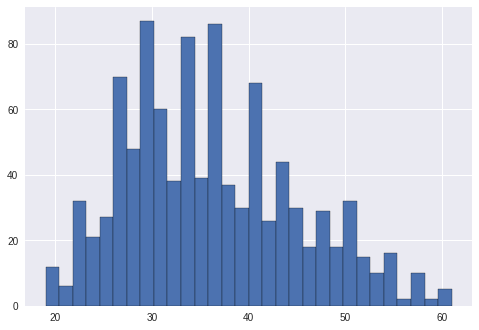

In [5]:
plt.hist(dataset['Age'],bins=30,edgecolor='black')
plt

Checking out the relationship between age and daily time spent on site.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(20, 100)

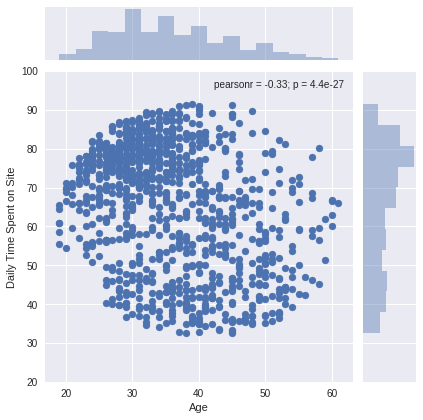

In [6]:
sns.jointplot('Age','Daily Time Spent on Site',dataset)
sns.plt.ylim(20, 100)

And the relationship between daily time spent on site and daily internet usage.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


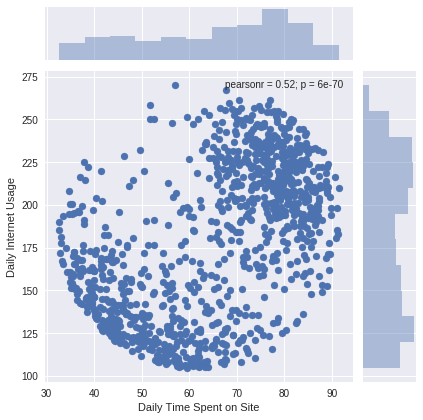

In [7]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage',dataset)


Finally, a pairplot to visualise everything else, colored on the basis of whether they clicked the ad or not.

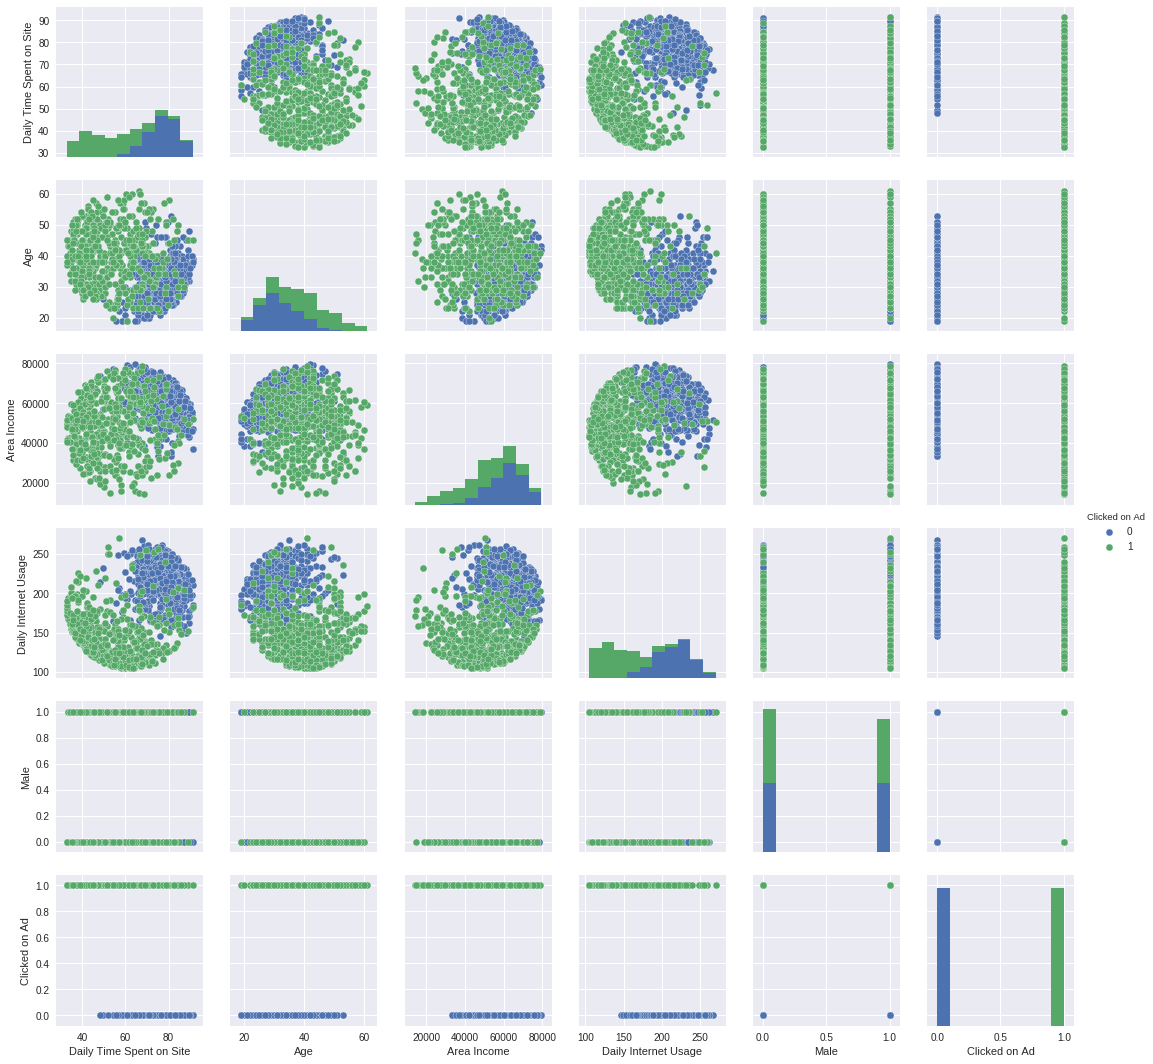

In [8]:
sns.pairplot(dataset,hue='Clicked on Ad')

## 3. Data Preprocessing

In [9]:
dataset.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


As we can't directly use the 'Country' feature (because it's a categorical string), we have to find another way to feed it into the model.

One way to go about this is to drop the feature, but we risk losing useful information.

So, what we can do is, convert the categorical feature into dummy variables using pandas.

In [0]:
countries = pd.get_dummies(dataset['Country'],drop_first=True)

Concatenating dummy variables with the original dataset, and dropping other features.

In [0]:
dataset = pd.concat([dataset,countries],axis=1)

In [12]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,0,0,0,0


Dropping redudant columns as they are not useful in predicting whether the user clicked on the ad or not.

In [0]:
dataset.drop(['Country','Ad Topic Line','City','Timestamp'],axis=1,inplace=True)

In [14]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Albania,Algeria,American Samoa,Andorra,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = dataset.drop('Clicked on Ad',axis=1)
y = dataset['Clicked on Ad']

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 4. Fitting the Logistic Regression classifier model

In [17]:
# Fitting LogisticRegression classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[117,   3],
       [ 25, 105]])

In [20]:
# Calculating the model accuracy
logistic_train_accuracy = classifier.score(X_train, y_train)*100
logistic_test_accuracy = classifier.score(X_test, y_test)*100
print('-------------Model Performance-------------')
print('Logistic Train Accuracy : ' + str(logistic_train_accuracy))
print('Logistic Test Accuracy : ' + str(logistic_test_accuracy))

-------------Model Performance-------------
Logistic Train Accuracy : 90.4
Logistic Test Accuracy : 88.8


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       120
           1       0.97      0.81      0.88       130

   micro avg       0.89      0.89      0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



## 5. Fitting the Random Forest Classifier model

In [22]:
# Fitting RandomForest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf =  RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [24]:
# Making the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[112,   8],
       [  7, 123]])

In [25]:
# Calculating the model accuracy
randomForest_train_accuracy = classifier_rf.score(X_train, y_train)*100
randomForest_test_accuracy = classifier_rf.score(X_test, y_test)*100
print('-----------------Model Performance-----------------')
print('Random Forest Train Accuracy : ' + str(randomForest_train_accuracy))
print('Random Forest Test Accuracy : ' + str(randomForest_test_accuracy))

-----------------Model Performance-----------------
Random Forest Train Accuracy : 100.0
Random Forest Test Accuracy : 94.0


In [26]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       120
           1       0.94      0.95      0.94       130

   micro avg       0.94      0.94      0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

